In [150]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [151]:
img = cv2.imread('dog.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [152]:
hist.shape

(256, 1)

In [153]:
print(hist)

[[  185.]
 [  109.]
 [  181.]
 [  199.]
 [  281.]
 [  305.]
 [  339.]
 [  439.]
 [  459.]
 [  576.]
 [  705.]
 [  819.]
 [  964.]
 [ 1123.]
 [ 1365.]
 [ 1378.]
 [ 1579.]
 [ 1617.]
 [ 1595.]
 [ 1803.]
 [ 1696.]
 [ 1709.]
 [ 1532.]
 [ 1493.]
 [ 1412.]
 [ 1376.]
 [ 1297.]
 [ 1259.]
 [ 1355.]
 [ 1394.]
 [ 1357.]
 [ 1442.]
 [ 1449.]
 [ 1496.]
 [ 1490.]
 [ 1651.]
 [ 1616.]
 [ 1661.]
 [ 1769.]
 [ 1866.]
 [ 1922.]
 [ 1964.]
 [ 2095.]
 [ 2196.]
 [ 2314.]
 [ 2395.]
 [ 2501.]
 [ 2635.]
 [ 2693.]
 [ 2734.]
 [ 2712.]
 [ 3000.]
 [ 3140.]
 [ 3196.]
 [ 3293.]
 [ 3281.]
 [ 3300.]
 [ 3644.]
 [ 3687.]
 [ 3677.]
 [ 3822.]
 [ 3794.]
 [ 4050.]
 [ 4118.]
 [ 4008.]
 [ 4119.]
 [ 4057.]
 [ 4167.]
 [ 4151.]
 [ 4221.]
 [ 4451.]
 [ 4633.]
 [ 4517.]
 [ 4666.]
 [ 4664.]
 [ 4714.]
 [ 4793.]
 [ 4857.]
 [ 4877.]
 [ 4990.]
 [ 5009.]
 [ 5398.]
 [ 5412.]
 [ 5461.]
 [ 5525.]
 [ 5437.]
 [ 5431.]
 [ 5503.]
 [ 5241.]
 [ 5403.]
 [ 5572.]
 [ 5380.]
 [ 5382.]
 [ 5367.]
 [ 5405.]
 [ 5457.]
 [ 5568.]
 [ 5681.]
 [ 5809.]
 [ 5936.]


In [154]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [155]:
print(hist)

[  185   109   181   199   281   305   339   439   459   576   705   819
   964  1123  1365  1378  1579  1617  1595  1803  1696  1709  1532  1493
  1412  1376  1297  1259  1355  1394  1357  1442  1449  1496  1490  1651
  1616  1661  1769  1866  1922  1964  2095  2196  2314  2395  2501  2635
  2693  2734  2712  3000  3140  3196  3293  3281  3300  3644  3687  3677
  3822  3794  4050  4118  4008  4119  4057  4167  4151  4221  4451  4633
  4517  4666  4664  4714  4793  4857  4877  4990  5009  5398  5412  5461
  5525  5437  5431  5503  5241  5403  5572  5380  5382  5367  5405  5457
  5568  5681  5809  5936  6156  6238  6463  6815  6849  7328  7416  7693
  7864  8125  8227  8318  8408  8444  8096  7983  7655  7536  7164  7186
  7010  6791  6734  6647  6522  6418  6218  6208  6205  6005  5766  5782
  5668  5484  5375  5381  5440  5360  5292  5328  5225  5326  5310  5300
  5432  5459  5490  5654  5864  5875  5872  6099  6457  6512  6923  7459
  7906  8681  9494  9612  9825 10491 11496 11914 12

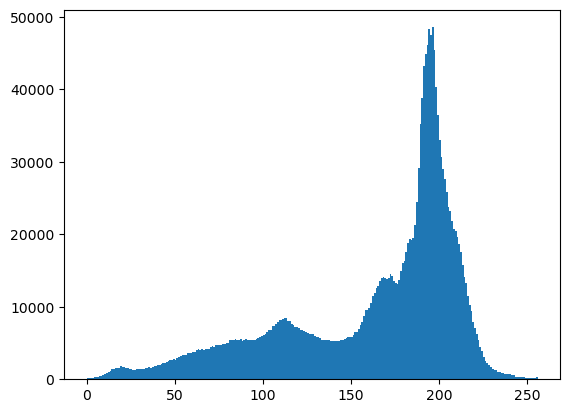

In [156]:
img = cv2.imread('dog.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

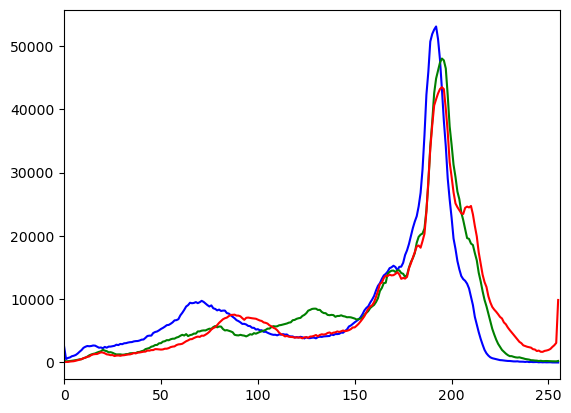

In [157]:
img = cv2.imread('dog.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

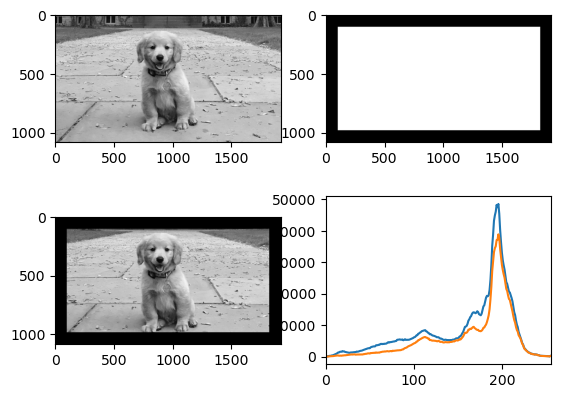

In [158]:
img = cv2.imread('dog.jpg',0)
 # create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:980, 100:1820] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
 # Calculate histogram with mask and without mask
 # Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

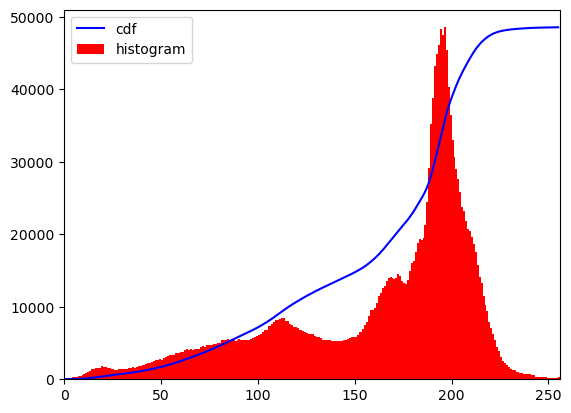

In [159]:
img = cv2.imread('dog.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [160]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

In [ ]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()